In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

In [2]:
house_df = pd.read_csv('train.csv')

In [6]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


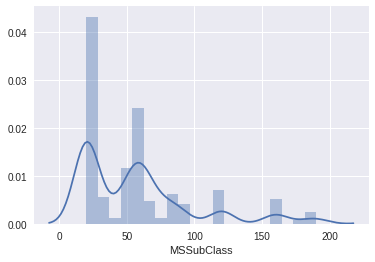

In [54]:
sns.distplot(house_df['MSSubClass'])

In [18]:
Counter(house_df.LandContour)

Counter({'Bnk': 63, 'HLS': 50, 'Low': 36, 'Lvl': 1311})

In [50]:
val_df = pd.DataFrame()
val_df['MSSubClass'] = house_df['MSSubClass']
val_df['LotFrontage'] = house_df['LotFrontage']
val_df['LotArea'] = house_df['LotArea']
val_df['PoolArea'] = house_df['PoolArea']
val_df['MiscVal'] = house_df['MiscVal']
val_df['SalePrice'] = house_df['SalePrice']

In [51]:
val_df = val_df.fillna({'LotFrontage' : val_df.LotFrontage.median()})

In [52]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
MSSubClass     1460 non-null int64
LotFrontage    1460 non-null float64
LotArea        1460 non-null int64
PoolArea       1460 non-null int64
MiscVal        1460 non-null int64
SalePrice      1460 non-null int64
dtypes: float64(1), int64(5)
memory usage: 68.5 KB


In [53]:
val_df.corr()

,MSSubClass,LotFrontage,LotArea,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.008283,-0.007683,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.180819,-0.000255,0.334771
LotArea,-0.139781,0.304522,1.000000,0.077672,0.038068,0.263843
PoolArea,0.008283,0.180819,0.077672,1.000000,0.029669,0.092404
MiscVal,-0.007683,-0.000255,0.038068,0.029669,1.000000,-0.021190
SalePrice,-0.084284,0.334771,0.263843,0.092404,-0.021190,1.000000


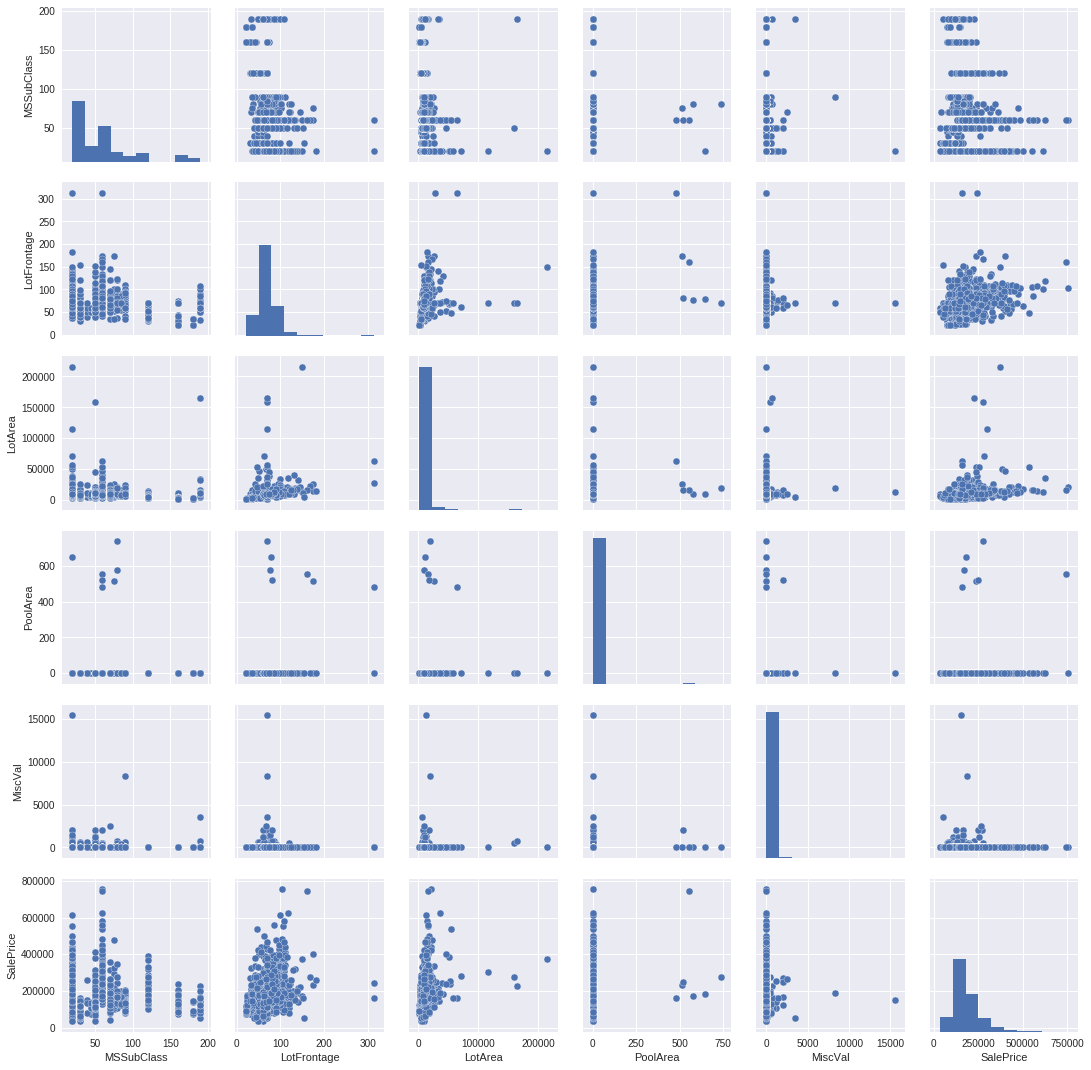

In [55]:
sns.pairplot(val_df)

In [61]:
# exclude exception data
val_df = val_df[val_df.LotFrontage < 150]
val_df = val_df[val_df.LotArea < 50000]

In [62]:
val_df.describe()

,MSSubClass,LotFrontage,LotArea,PoolArea,MiscVal,SalePrice
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,57.012491,69.029146,9826.958362,1.721721,43.229702,179436.343511
std,42.334759,18.929855,4525.417748,32.928937,498.918111,77037.438126
min,20.000000,21.000000,1300.000000,0.000000,0.000000,34900.000000
25%,20.000000,60.000000,7500.000000,0.000000,0.000000,129900.000000
50%,50.000000,69.000000,9416.000000,0.000000,0.000000,162000.000000
75%,70.000000,78.000000,11457.000000,0.000000,0.000000,212000.000000
max,190.000000,149.000000,46589.000000,738.000000,15500.000000,755000.000000


In [63]:
val_df.corr()

,MSSubClass,LotFrontage,LotArea,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.407070,-0.316196,0.003872,-0.010921,-0.084593
LotFrontage,-0.407070,1.000000,0.498585,0.017269,0.003599,0.357993
LotArea,-0.316196,0.498585,1.000000,0.051613,0.041789,0.375611
PoolArea,0.003872,0.017269,0.051613,1.000000,0.039343,0.028273
MiscVal,-0.010921,0.003599,0.041789,0.039343,1.000000,-0.021820
SalePrice,-0.084593,0.357993,0.375611,0.028273,-0.021820,1.000000


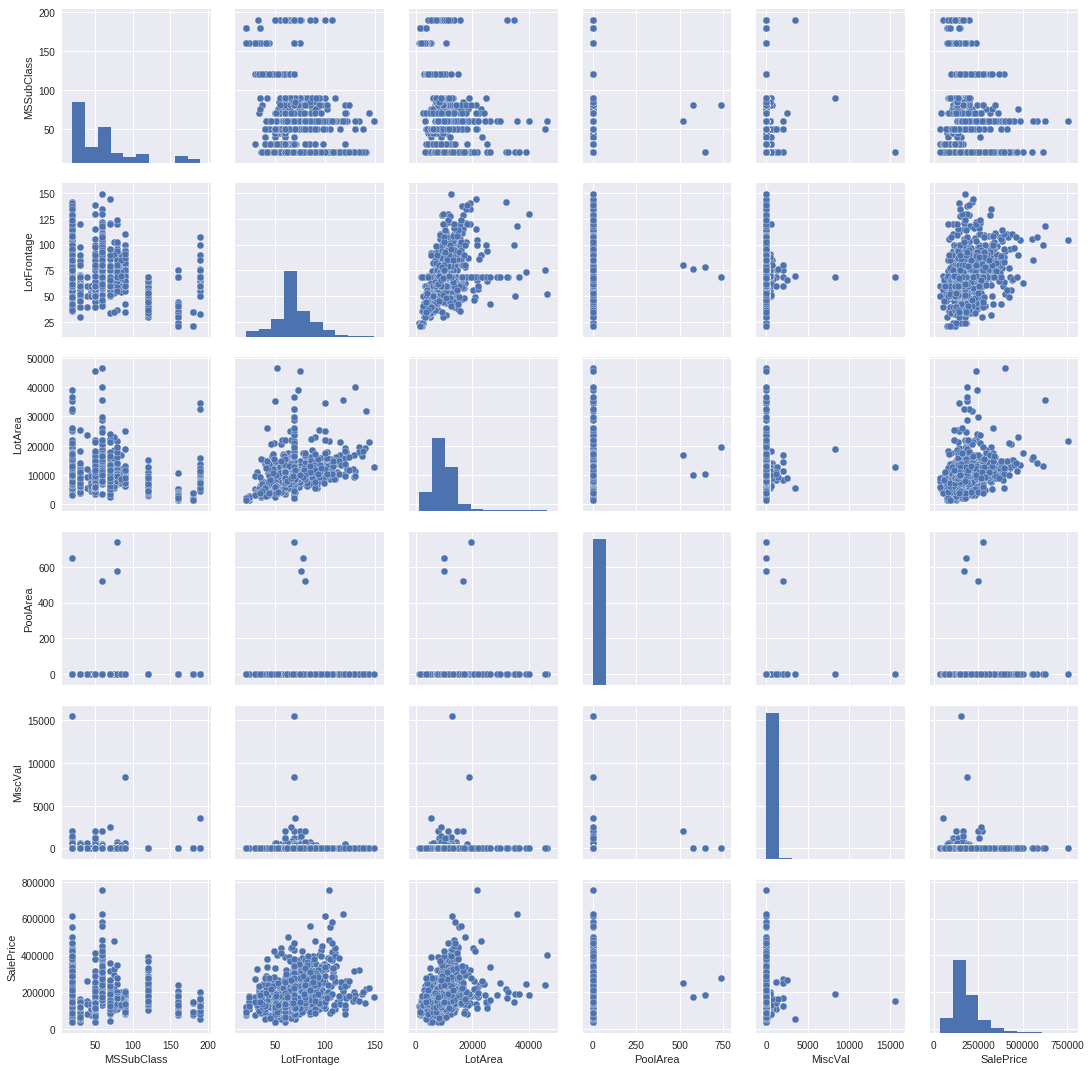

In [64]:
sns.pairplot(val_df)